# TensorFlow Biomech Pitch Speed Prediction
### Mojisoluwa (Jiso) Awe

In this notebook I will be implementing TensorFlow to try and predict pitch velocity based on kinematic movements.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
biomech = pd.read_csv('pitching_poi_metrics.csv')
metadata = pd.read_csv('pitching_metadata.csv')
data = pd.merge(biomech, metadata)

In [54]:
list(data.columns)

['session_pitch',
 'session',
 'p_throws',
 'pitch_type',
 'pitch_speed_mph',
 'max_shoulder_internal_rotational_velo',
 'max_elbow_extension_velo',
 'max_torso_rotational_velo',
 'max_rotation_hip_shoulder_separation',
 'max_elbow_flexion',
 'max_shoulder_external_rotation',
 'elbow_flexion_fp',
 'elbow_pronation_fp',
 'rotation_hip_shoulder_separation_fp',
 'shoulder_horizontal_abduction_fp',
 'shoulder_abduction_fp',
 'shoulder_external_rotation_fp',
 'lead_knee_extension_angular_velo_fp',
 'lead_knee_extension_angular_velo_br',
 'lead_knee_extension_angular_velo_max',
 'torso_anterior_tilt_fp',
 'torso_lateral_tilt_fp',
 'torso_rotation_fp',
 'pelvis_anterior_tilt_fp',
 'pelvis_lateral_tilt_fp',
 'pelvis_rotation_fp',
 'max_cog_velo_x',
 'torso_rotation_min',
 'max_pelvis_rotational_velo',
 'glove_shoulder_horizontal_abduction_fp',
 'glove_shoulder_abduction_fp',
 'glove_shoulder_external_rotation_fp',
 'glove_shoulder_abduction_mer',
 'elbow_flexion_mer',
 'torso_anterior_tilt_mer

In [56]:
data.isnull().sum().max()

8

In [58]:
data = data.dropna()

In [60]:
cat = data.select_dtypes(include = ['object', 'category'])
list(cat.columns)

['session_pitch',
 'p_throws',
 'pitch_type',
 'playing_level',
 'filename_new',
 'modelname_new']

In [62]:
merged_data = data.drop(columns = ['session_pitch','filename_new', 'modelname_new'])
data = pd.get_dummies(merged_data)

In [64]:
y = data['pitch_speed_mph']
X = data.drop(columns = ['pitch_speed_mph'])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 234)

In [80]:
#building tensorflow model
model = keras.Sequential([
    layers.InputLayer(input_shape = (X_train.shape[1],)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [82]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 480857.0312 - mean_absolute_error: 602.4410 - val_loss: 157697.1406 - val_mean_absolute_error: 346.8099
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 112469.2109 - mean_absolute_error: 312.1544 - val_loss: 52909.5156 - val_mean_absolute_error: 101.0709
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 51617.9961 - mean_absolute_error: 141.8555 - val_loss: 25947.3223 - val_mean_absolute_error: 113.2859
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 44587.1758 - mean_absolute_error: 107.9965 - val_loss: 26452.9453 - val_mean_absolute_error: 82.7964
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18517.6855 - mean_absolute_error: 83.1187 - val_loss: 23247.5293 - val_mean_absolute_error: 74.3703
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12051.9980 - mean_absolute_error: 66.0085 - val_loss: 11181.4209 - val_mean_absolute_error: 58.3693
Epoch 7/100
10/10 ━━━━━━━━━━━━━

In [83]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test MAE:', test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 342.8824 - mean_absolute_error: 11.7723
Test MAE: 13.201955795288086


In [84]:
predictions = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x16fc95f80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


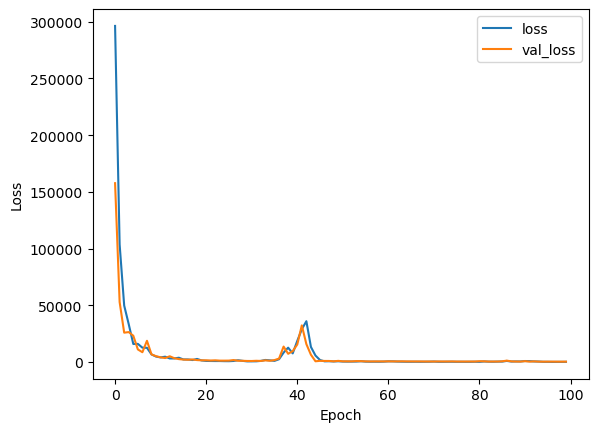

In [85]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Hyperparameter Tuning